pytorch KMNIST 数据集神经网络搭建及训练

In [78]:
# 导入相关依赖包
import numpy as np
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torchvision.transforms.v2 import ToTensor

In [138]:
# 超参数定义
LR = 0.01 # 学习率
BATCH_SIZE = 128 # 数据批量大小
EPOCHS = 60 # 训练轮数

In [139]:
# 数据准备
data_train = datasets.KMNIST(
    root='../dataset',
    download=True,
    train=True,
    transform=ToTensor(),
)
data_test = datasets.KMNIST(
    root='../dataset',
    download=True,
    train=False,
    transform=ToTensor(),
)

In [140]:
# 数据批量化加载
train_loader = DataLoader(data_train, batch_size=BATCH_SIZE, shuffle=True) # shuffle=true 随机打乱数据，增肌模型训练结果的泛化能力
test_loader = DataLoader(data_test, batch_size=BATCH_SIZE, shuffle=True)

In [141]:
# 模型构建
model = torch.nn.Sequential(
    # 将图片转换为 shape(, 784) 输入项 784个特征， 神经元数量 128
    nn.Linear(in_features=28 * 28, out_features=128),
    # 使用RELU 损失函数
    nn.ReLU(),
    # 输出层，输入128个特征，输出 10个类别的预测值
    nn.Linear(in_features=128, out_features=10)
)

In [142]:
# 定义损失函数
loss_function = nn.CrossEntropyLoss() # 使用交叉熵损失

In [143]:
# 定义优化器
optimizer = optim.SGD(model.parameters(), lr=LR, momentum=0.9, nesterov=True)

epoch 0, loss 0.5157580971717834
epoch 1, loss 0.3525071442127228
epoch 2, loss 0.4351678788661957
epoch 3, loss 0.4956175982952118
epoch 4, loss 0.3416694700717926
epoch 5, loss 0.14980433881282806
epoch 6, loss 0.20677639544010162
epoch 7, loss 0.21504837274551392
epoch 8, loss 0.040004756301641464
epoch 9, loss 0.14728471636772156
epoch 10, loss 0.12309222668409348
epoch 11, loss 0.12420982867479324
epoch 12, loss 0.13434971868991852
epoch 13, loss 0.05707421526312828
epoch 14, loss 0.04201870784163475
epoch 15, loss 0.12992213666439056
epoch 16, loss 0.14533546566963196
epoch 17, loss 0.052694980055093765
epoch 18, loss 0.041235800832509995
epoch 19, loss 0.07193052768707275
epoch 20, loss 0.08065403997898102
epoch 21, loss 0.034096818417310715
epoch 22, loss 0.03973764181137085
epoch 23, loss 0.06469980627298355
epoch 24, loss 0.026626264676451683
epoch 25, loss 0.06720075011253357
epoch 26, loss 0.033444833010435104
epoch 27, loss 0.13602031767368317
epoch 28, loss 0.134373098611

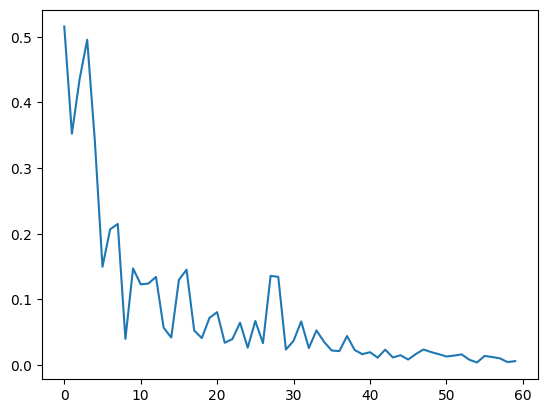

In [144]:
loss_history = []
# 开始模型训练
for epoch in range(EPOCHS):
    # 批量加载训练数据
    for images, labels in train_loader:
        # 前向计算
        out = model(images.reshape(-1, 28 * 28))
        # 计算损失
        loss = loss_function(out, labels)
        # 梯度计算
        optimizer.zero_grad() # 参数累计梯度清零
        loss.backward() # 反向传播计算梯度
        # 更新参数
        optimizer.step()
    loss_history.append(loss.item())
    print(f'epoch {epoch}, loss {loss.item()}')

# 绘制损失与训练轮数的变化
plt_x = range(0, EPOCHS, 1)
plt.plot(plt_x, loss_history)
plt.show()
# 保存模型参数（路径推荐使用.pt或.pth后缀）
torch.save(model, 'model_complete.pt')

In [145]:
# 测试
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data.reshape(-1, 28 * 28))
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += predicted.eq(target.data).sum().item()
    print(f'accuracy {100 * correct / total:.2f}%')

accuracy 88.94%
